# Model Testing


## Setup


In [1]:
from scripts.preprocessing.data_loader import get_train_test_splits, get_combined_dataset
from scripts.preprocessing.preprocessor import apply_minmax_scaling
from scripts.models.model_list import load_models
from scripts.models.model_testing import test_models
from IPython.display import display
from scripts.visualisations.plotting import plot_averaged_heatmap, plot_group_averaged_spatial_heatmap
from scripts.visualisations.helpers import rescale_features
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = get_train_test_splits(test_size=0.2)
X_train, y_train, train_scales = apply_minmax_scaling(X_train, y_train)
X_test, y_test, test_scales = apply_minmax_scaling(X_test, y_test)
df = get_combined_dataset(X_train, y_train, X_test, y_test)

TEST_SET, ALL_SINGLE_TARGET_MODELS, REFINED_SINGLE_TARGET_MODELS, ALL_MULTI_TARGET_MODELS, REFINED_MULTI_TARGET_MODELS = load_models()
print(f"Number of single-target models: {len(ALL_SINGLE_TARGET_MODELS)}")
print(f"Number of multi-target models: {len(ALL_MULTI_TARGET_MODELS)}")

print(f"X train shape: {X_train.shape}")
print(f"X test shape: {X_test.shape}")
print(f"y train shape: {y_train.shape}")
print(f"y test shape: {y_test.shape}")


Train years: 2015 to 2083
Test years: 2084 to 2100
Number of single-target models: 26
Number of multi-target models: 11
X train shape: (155733, 19)
X test shape: (38369, 19)
y train shape: (155733, 3)
y test shape: (38369, 3)


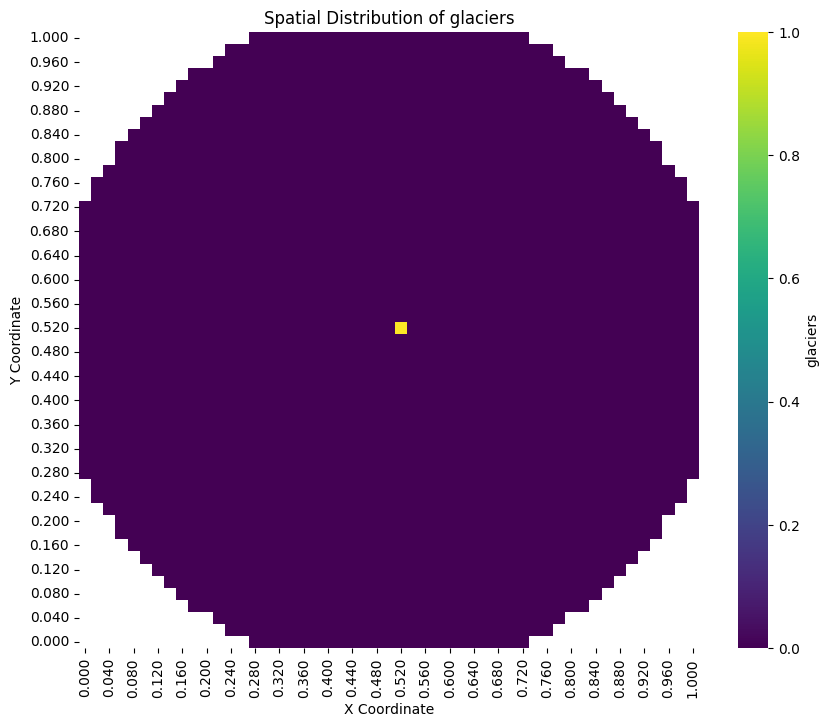

In [5]:
# List of cells by X Y coordinate
glacial_coordinates = [[0.520,0.520],[1,1]]
df['glaciers'] = df[['x','y']].apply(lambda row: 1 if row.to_list() in glacial_coordinates else 0, axis=1)
plot = plot_averaged_heatmap(df, 'glaciers')

## Dataset

In [5]:
display("Full Dataset",df)
display("Variable Measurements",df.describe())
display("Dataset Info", df.info())

positional_constants = ['x', 'y', 'year']
features = ['bedrock_elevation', 'precipitation', 'air_temperature', 'ocean_temperature']
target = ['ice_thickness', 'ice_velocity', 'ice_mask']
derived = ['distance_to_pole', 'bedrock_below_sea_level', 'temperature_difference', 
            'log_air_temperature', 'rolling_std_precipitation', 'rolling_std_air_temperature', 
            'air_temperature_low_45', 'bedrock_slope_x', 'bedrock_slope_y', 'bedrock_slope_magnitude',
            'surface_mass_balance', 'years_since_start']

print(len(positional_constants), len(features), len(derived), len(target))

display("Features", df[features].describe())
display("Target", df[target].describe())
display("Derived", df[derived].describe())


'Full Dataset'

,x,y,bedrock_elevation,precipitation,air_temperature,ocean_temperature,year,distance_to_pole,bedrock_below_sea_level,temperature_difference,...,air_temperature_low_45,bedrock_slope_x,bedrock_slope_y,bedrock_slope_magnitude,surface_mass_balance,years_since_start,set,ice_thickness,ice_velocity,ice_mask
0,0.28,1.0,0.118762,0.180874,0.795808,0.268660,0.0,1.000000,1.0,0.195877,...,0.0,0.397127,0.464027,0.000000,0.184757,0.0,train,0.0,0.0,1.0
1,0.30,1.0,0.163009,0.175715,0.793057,0.258708,0.0,0.985824,1.0,0.197598,...,0.0,0.442050,0.464027,0.057671,0.179702,0.0,train,0.0,0.0,1.0
2,0.32,1.0,0.042803,0.173047,0.791427,0.251029,0.0,0.972821,1.0,0.198422,...,0.0,0.275084,0.464027,0.156675,0.177093,0.0,train,0.0,0.0,1.0
3,0.34,1.0,0.135461,0.178002,0.790789,0.245280,0.0,0.961037,1.0,0.198443,...,0.0,0.491200,0.464027,0.120768,0.182037,0.0,train,0.0,0.0,1.0
4,0.36,1.0,0.087251,0.190951,0.790841,0.240754,0.0,0.950518,1.0,0.197891,...,0.0,0.348181,0.464027,0.062835,0.194912,0.0,train,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194097,0.64,0.0,0.347665,0.592466,0.831212,0.272332,1.0,0.950518,1.0,0.167398,...,0.0,0.350995,0.365608,0.130039,0.592096,1.0,test,0.0,0.0,1.0
194098,0.66,0.0,0.326669,0.557774,0.838175,0.285703,1.0,0.961037,1.0,0.162018,...,0.0,0.375801,0.341033,0.147429,0.557497,1.0,test,0.0,0.0,1.0
194099,0.68,0.0,0.365826,0.535849,0.843655,0.296153,1.0,0.972821,1.0,0.157776,...,0.0,0.436876,0.376141,0.115245,0.535603,1.0,test,0.0,0.0,1.0
194100,0.70,0.0,0.416587,0.533697,0.851775,0.315210,1.0,0.985824,1.0,0.151929,...,0.0,0.448657,0.515949,0.089759,0.533259,1.0,test,0.0,0.0,1.0


'Variable Measurements'

,x,y,bedrock_elevation,precipitation,air_temperature,ocean_temperature,year,distance_to_pole,bedrock_below_sea_level,temperature_difference,...,rolling_std_air_temperature,air_temperature_low_45,bedrock_slope_x,bedrock_slope_y,bedrock_slope_magnitude,surface_mass_balance,years_since_start,ice_thickness,ice_velocity,ice_mask
count,194102.000000,194102.000000,194102.000000,194102.000000,194102.000000,194102.000000,194102.000000,194102.000000,194102.000000,194102.000000,...,194102.000000,194102.000000,194102.000000,194102.000000,194102.000000,194102.000000,194102.000000,194102.000000,194102.000000,194102.000000
mean,0.500000,0.500000,0.448466,0.227651,0.664751,0.300004,0.500000,0.654930,0.800904,0.334532,...,0.132858,0.450001,0.397115,0.464056,0.122887,0.234737,0.500000,0.169265,0.002387,0.612915
std,0.268418,0.268418,0.248347,0.155997,0.269263,0.148372,0.295566,0.232295,0.399322,0.266910,...,0.152931,0.497495,0.094184,0.104695,0.121654,0.149261,0.295566,0.254166,0.017803,0.478661
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.280000,0.280000,0.202051,0.073388,0.460199,0.193012,0.250000,0.491210,1.000000,0.122919,...,0.029670,0.000000,0.362717,0.431305,0.037178,0.087400,0.250000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.515438,0.231066,0.790091,0.264870,0.500000,0.695639,1.000000,0.198799,...,0.075701,0.000000,0.395926,0.465161,0.081196,0.234990,0.500000,0.000000,0.000000,1.000000
75%,0.720000,0.720000,0.662950,0.350513,0.877833,0.373267,0.750000,0.849223,1.000000,0.534037,...,0.171213,1.000000,0.427299,0.502629,0.164626,0.351355,0.750000,0.355686,0.000276,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194102 entries, 0 to 194101
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   x                            194102 non-null  float64
 1   y                            194102 non-null  float64
 2   bedrock_elevation            194102 non-null  float64
 3   precipitation                194102 non-null  float64
 4   air_temperature              194102 non-null  float64
 5   ocean_temperature            194102 non-null  float64
 6   year                         194102 non-null  float64
 7   distance_to_pole             194102 non-null  float64
 8   bedrock_below_sea_level      194102 non-null  float64
 9   temperature_difference       194102 non-null  float64
 10  log_air_temperature          194102 non-null  float64
 11  rolling_std_precipitation    194102 non-null  float64
 12  rolling_std_air_temperature  194102 non-null  float64
 13 

'Dataset Info'

None

3 4 12 3


'Features'

,bedrock_elevation,precipitation,air_temperature,ocean_temperature
count,194102.000000,194102.000000,194102.000000,194102.000000
mean,0.448466,0.227651,0.664751,0.300004
std,0.248347,0.155997,0.269263,0.148372
min,0.000000,0.000000,0.000000,0.000000
25%,0.202051,0.073388,0.460199,0.193012
50%,0.515438,0.231066,0.790091,0.264870
75%,0.662950,0.350513,0.877833,0.373267
max,1.000000,1.000000,1.000000,1.000000


'Target'

,ice_thickness,ice_velocity,ice_mask
count,194102.000000,194102.000000,194102.000000
mean,0.169265,0.002387,0.612915
std,0.254166,0.017803,0.478661
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000
75%,0.355686,0.000276,1.000000
max,1.000000,1.000000,1.000000


'Derived'

,distance_to_pole,bedrock_below_sea_level,temperature_difference,log_air_temperature,rolling_std_precipitation,rolling_std_air_temperature,air_temperature_low_45,bedrock_slope_x,bedrock_slope_y,bedrock_slope_magnitude,surface_mass_balance,years_since_start
count,194102.000000,194102.000000,194102.000000,194102.000000,194102.000000,194102.000000,194102.000000,194102.000000,194102.000000,194102.000000,194102.000000,194102.000000
mean,0.654930,0.800904,0.334532,0.683837,0.060892,0.132858,0.450001,0.397115,0.464056,0.122887,0.234737,0.500000
std,0.232295,0.399322,0.266910,0.264363,0.086349,0.152931,0.497495,0.094184,0.104695,0.121654,0.149261,0.295566
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.491210,1.000000,0.122919,0.492621,0.012105,0.029670,0.000000,0.362717,0.431305,0.037178,0.087400,0.250000
50%,0.695639,1.000000,0.198799,0.810557,0.029775,0.075701,0.000000,0.395926,0.465161,0.081196,0.234990,0.500000
75%,0.849223,1.000000,0.534037,0.890761,0.072282,0.171213,1.000000,0.427299,0.502629,0.164626,0.351355,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


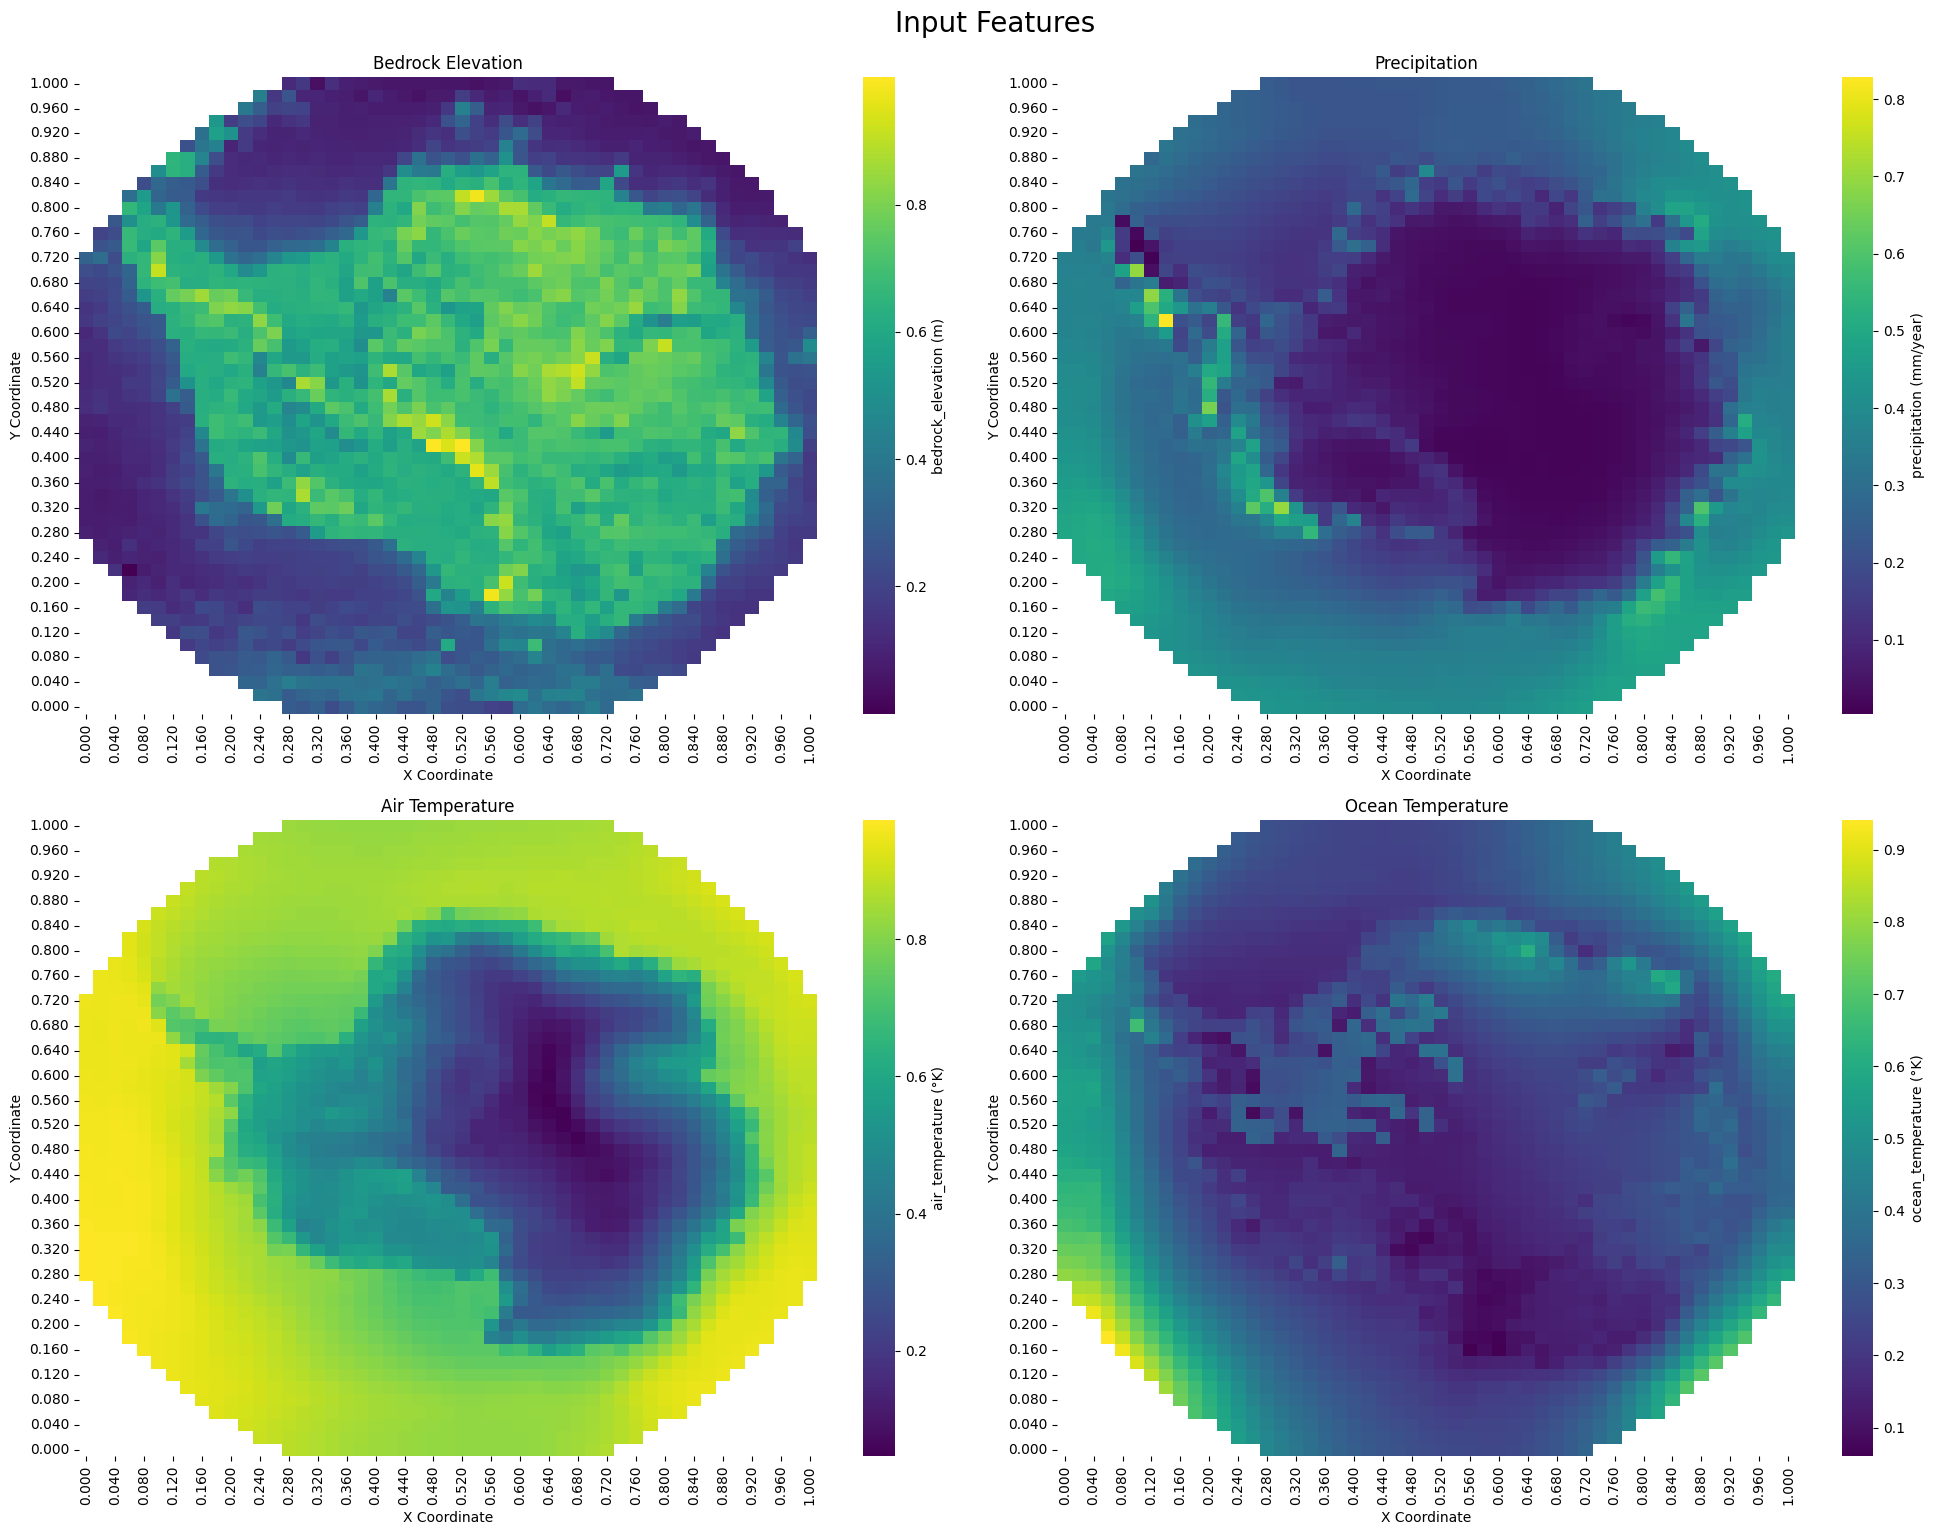

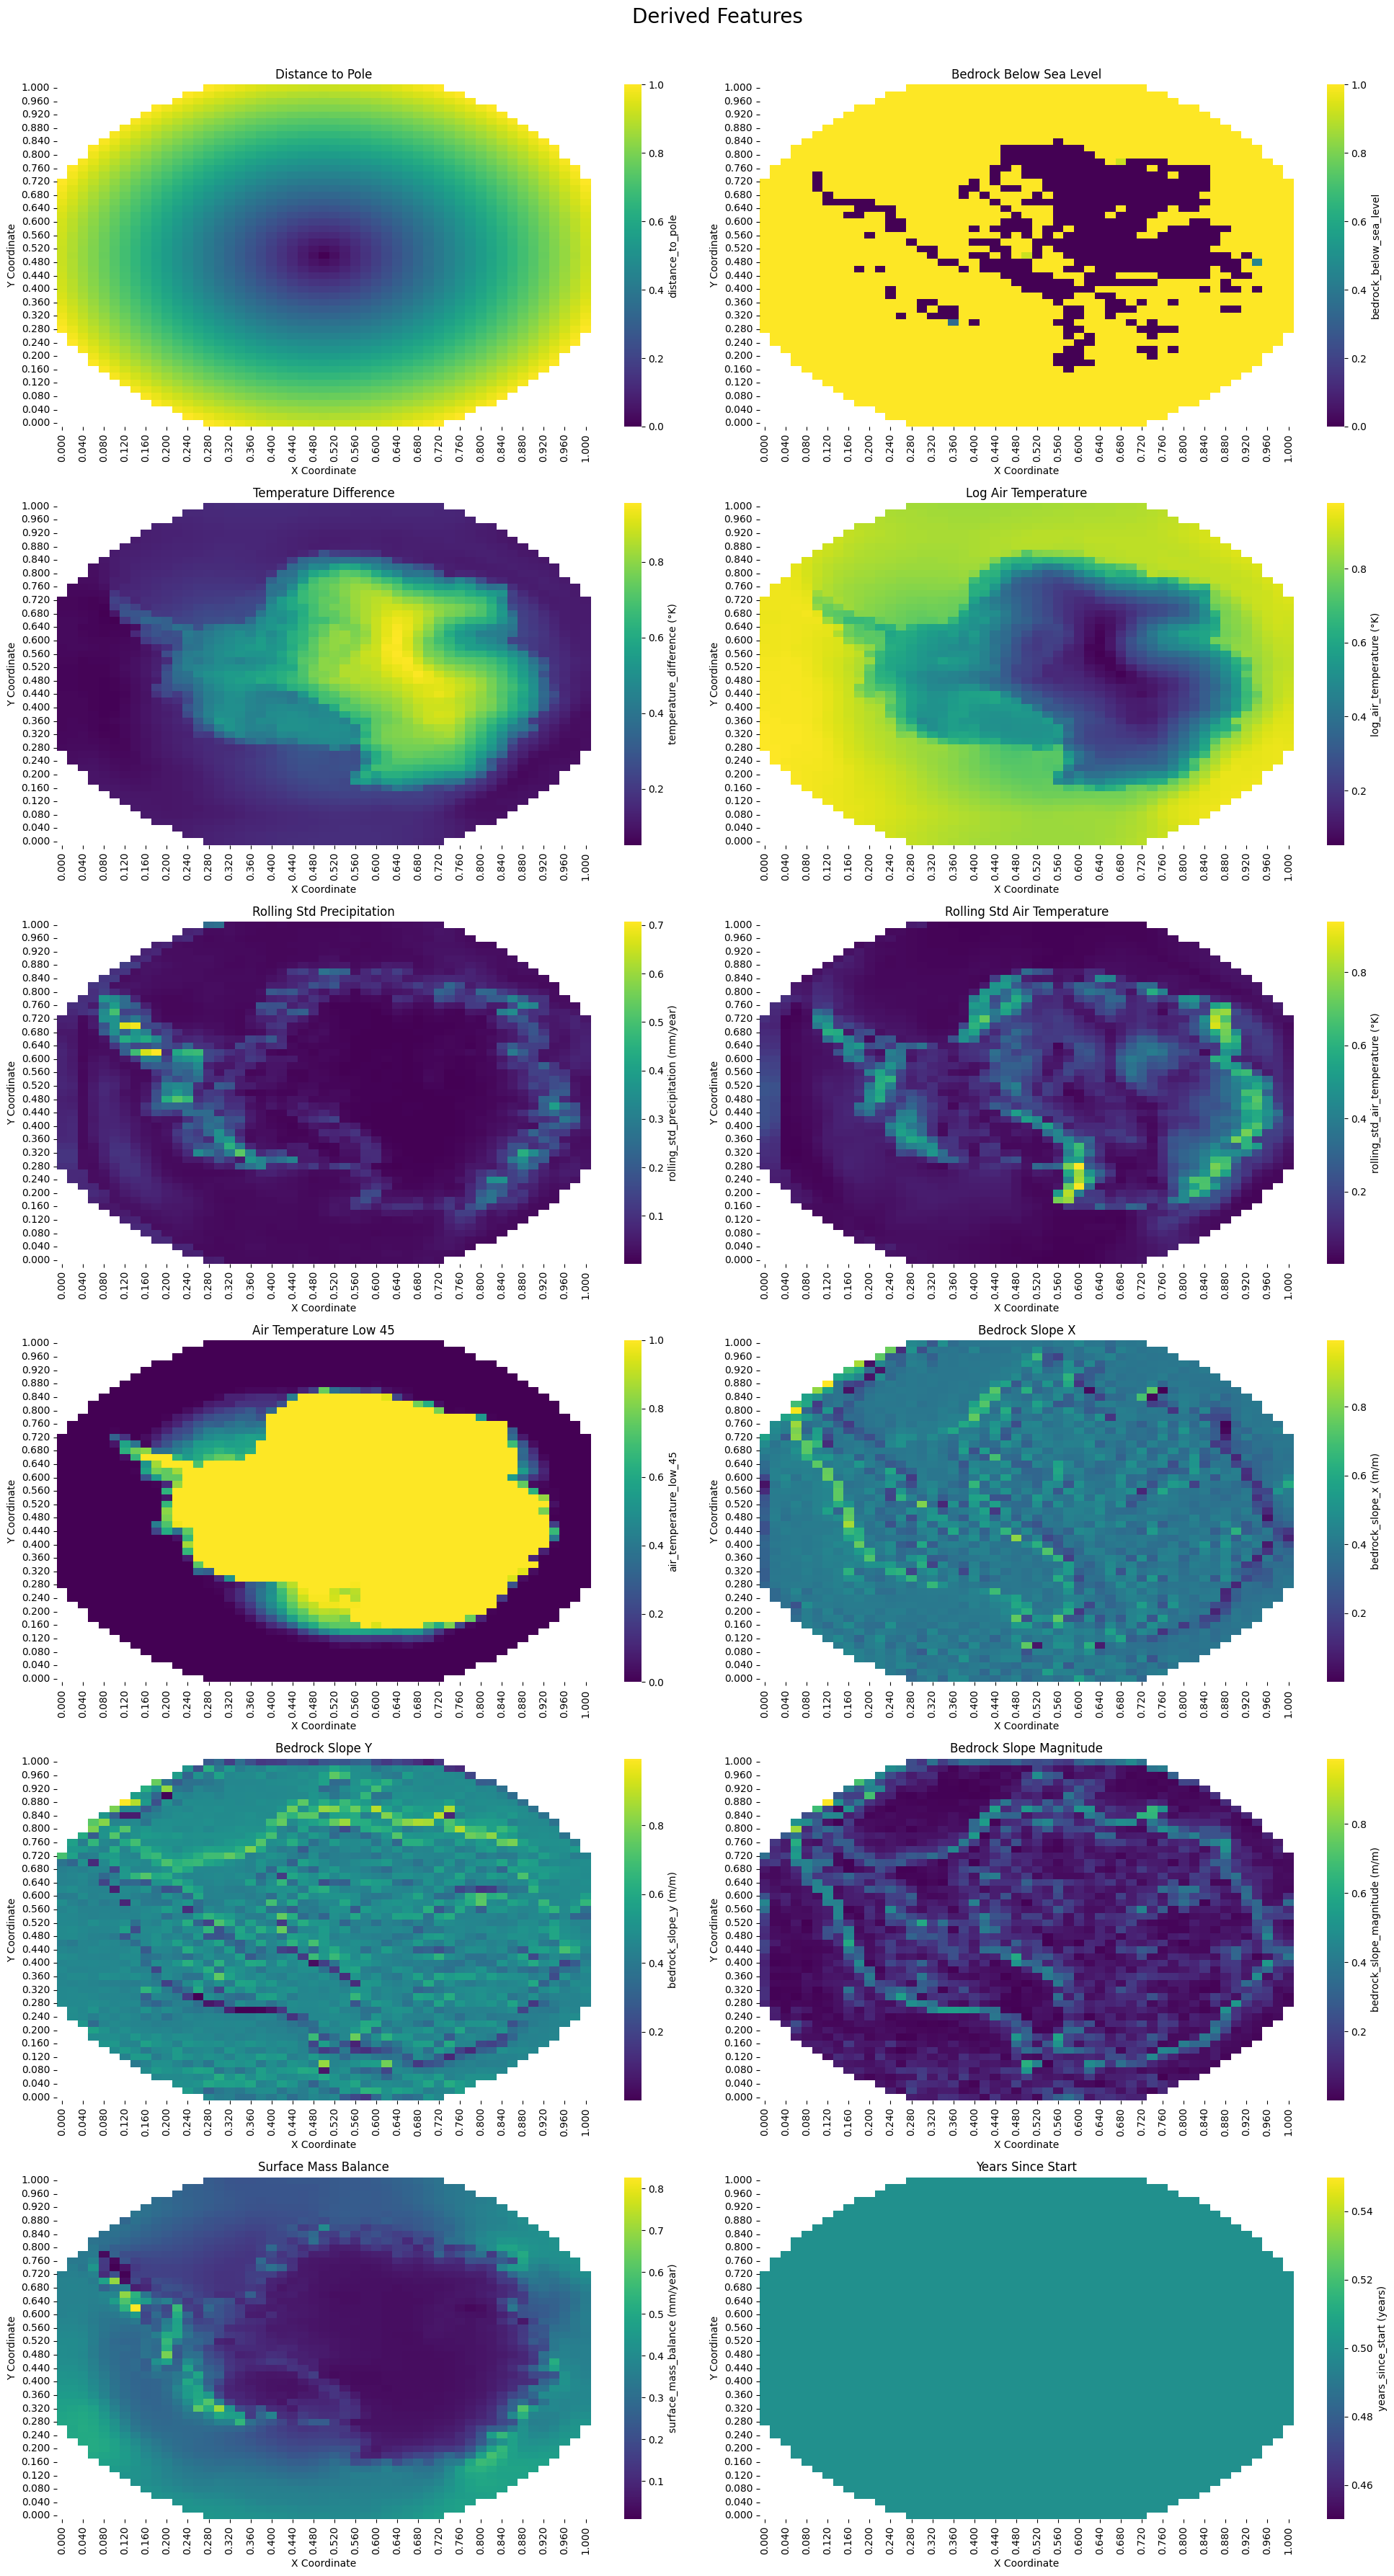

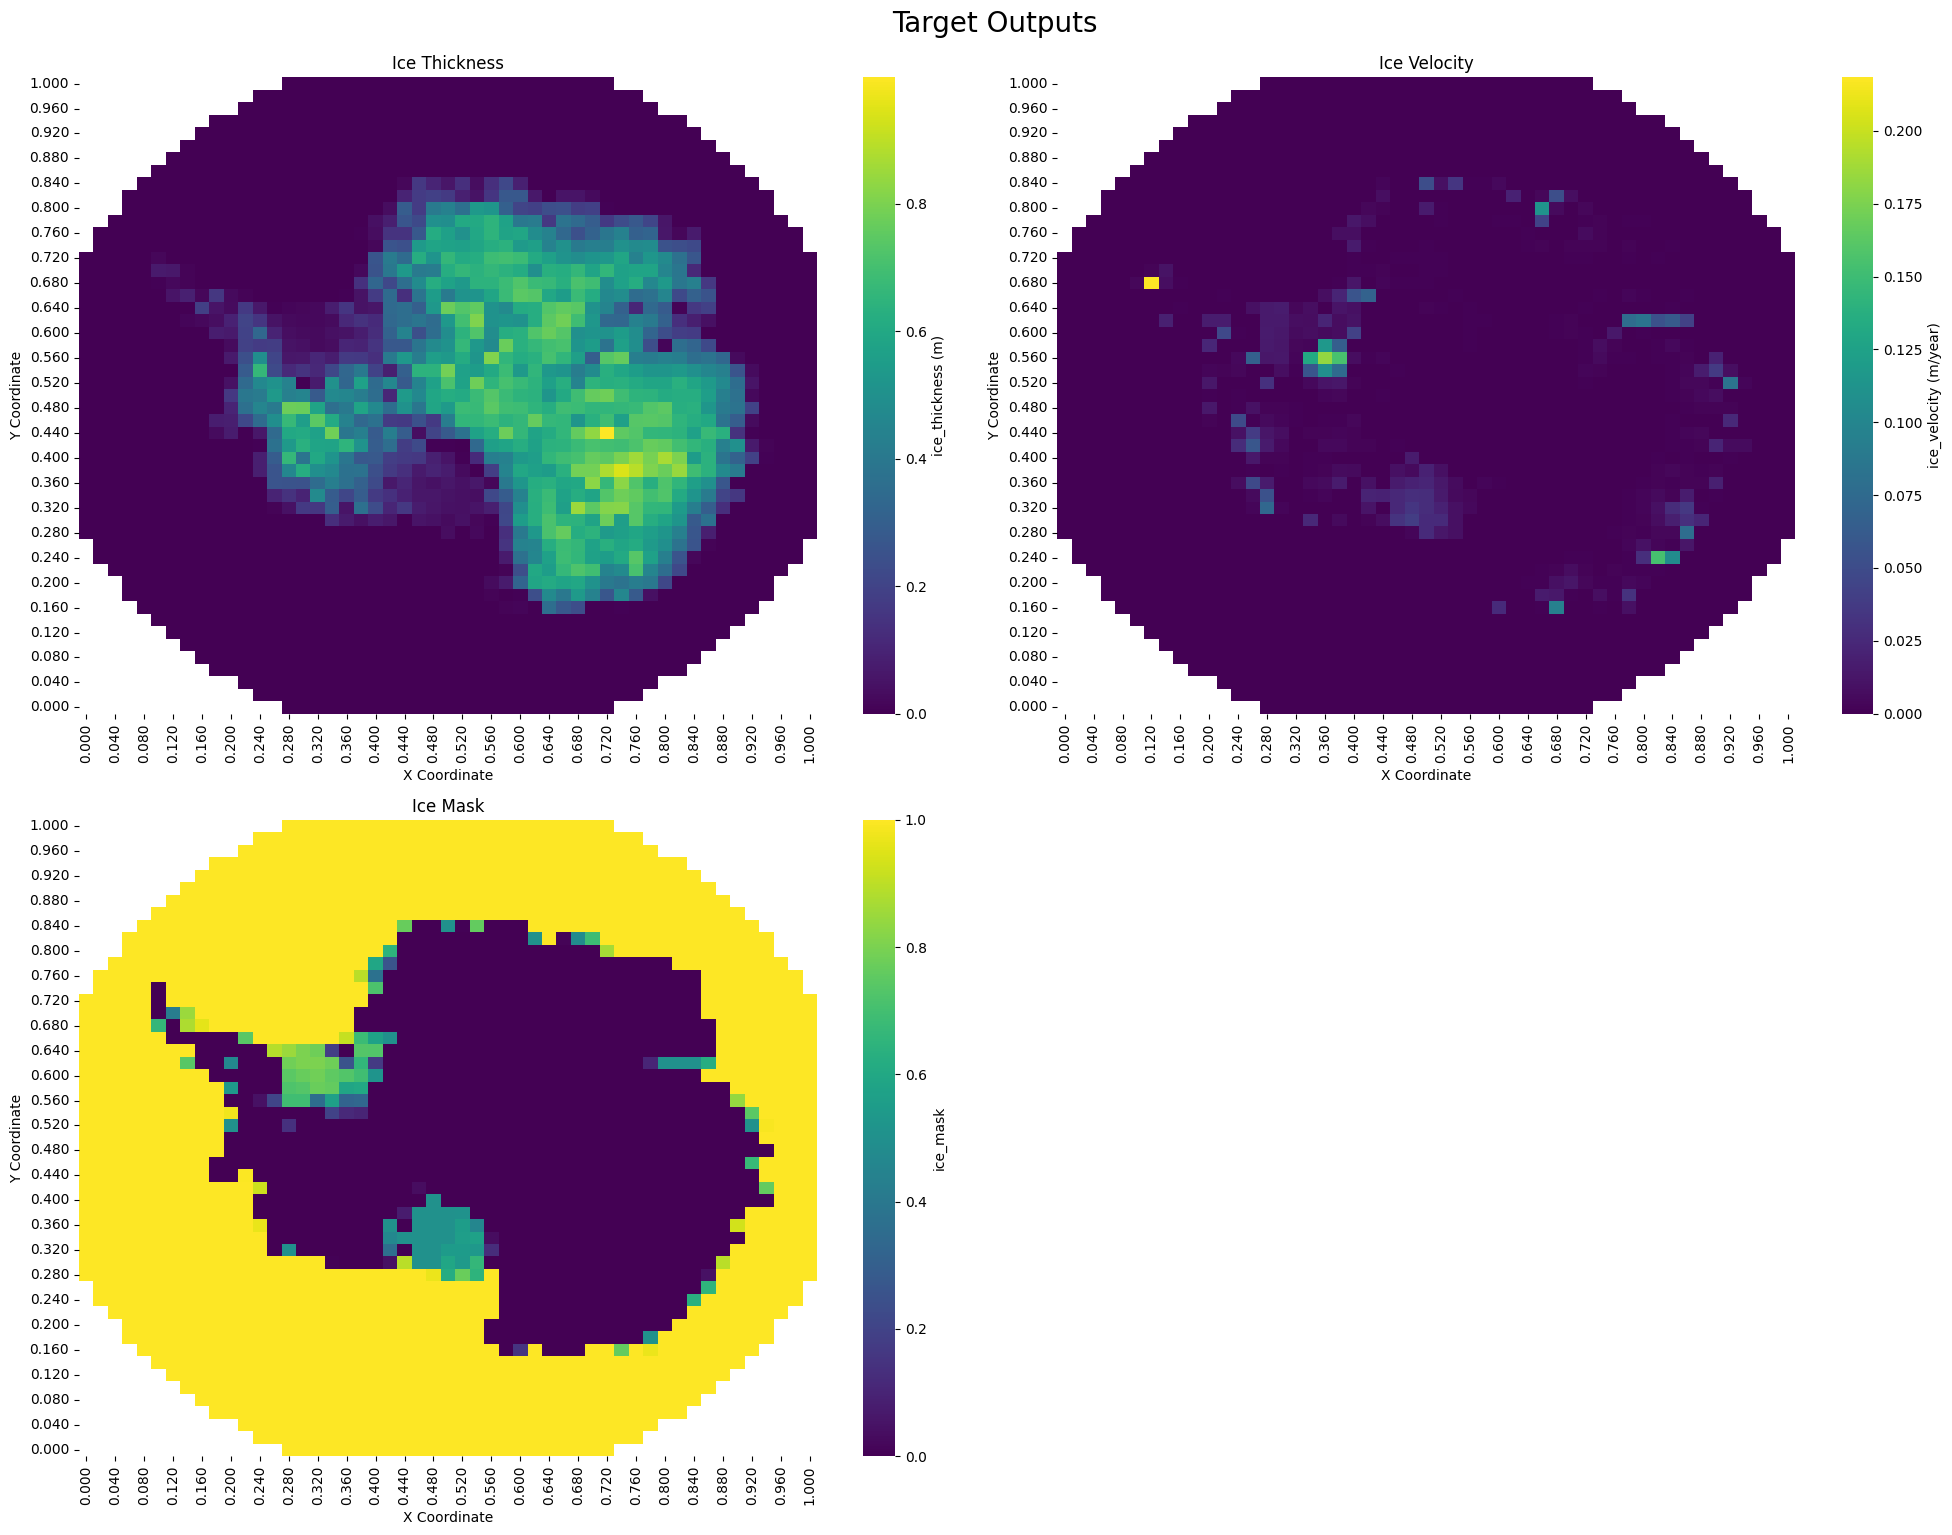

In [2]:
df_test = df[df['set'] == 'test'].copy()
df_test = rescale_features(df_test, test_scales)

input_features = ['bedrock_elevation', 'precipitation', 'air_temperature', 'ocean_temperature']
input_titles = ['Bedrock Elevation', 'Precipitation', 'Air Temperature', 'Ocean Temperature']
input_units = ['m', 'mm/year', '°K', '°K']

derived_features = ['distance_to_pole', 'bedrock_below_sea_level', 'temperature_difference', 
                    'log_air_temperature', 'rolling_std_precipitation', 'rolling_std_air_temperature', 
                    'air_temperature_low_45', 'bedrock_slope_x', 'bedrock_slope_y', 'bedrock_slope_magnitude', 'surface_mass_balance', 'years_since_start']
derived_titles = ['Distance to Pole', 'Bedrock Below Sea Level', 'Temperature Difference', 
                    'Log Air Temperature', 'Rolling Std Precipitation', 'Rolling Std Air Temperature', 
                    'Air Temperature Low 45', 'Bedrock Slope X', 'Bedrock Slope Y', 'Bedrock Slope Magnitude', 'Surface Mass Balance', 'Years Since Start']
derived_units = ['', '', '°K', '°K', 'mm/year', '°K', '', 'm/m', 'm/m', 'm/m', 'mm/year', 'years']

target_features = ['ice_thickness', 'ice_velocity', 'ice_mask']
target_titles = ['Ice Thickness', 'Ice Velocity', 'Ice Mask']
target_units = ['m', 'm/year', '']

input_plot = plot_group_averaged_spatial_heatmap(df, input_features, input_titles, input_units, figsize=(20, 15))
input_plot.suptitle('Input Features', fontsize=20, y=1.02)
input_plot.savefig('out/images/input_features_heatmaps.png', dpi=300, bbox_inches='tight')

derived_plot = plot_group_averaged_spatial_heatmap(df, derived_features, derived_titles, derived_units, figsize=(20, 35))
derived_plot.suptitle('Derived Features', fontsize=20, y=1.02)
derived_plot.savefig('out/images/derived_features_heatmaps.png', dpi=300, bbox_inches='tight')

target_plot = plot_group_averaged_spatial_heatmap(df, target_features, target_titles, target_units, figsize=(20, 15))
target_plot.suptitle('Target Outputs', fontsize=20, y=1.02)
target_plot.savefig('out/images/target_outputs_heatmaps.png', dpi=300, bbox_inches='tight')

plt.show()

## Broad Testing


### Single-Target


In [ ]:
broad_single_target_results = test_models(ALL_SINGLE_TARGET_MODELS, multi=False, cv=5, refined=False, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

### Multi-Target


In [ ]:
broad_multi_target_results = test_models(ALL_MULTI_TARGET_MODELS, multi=True, cv=5, refined=False, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

## Refined Testing


### Single-Target


In [ ]:
refined_single_target_results = test_models(REFINED_SINGLE_TARGET_MODELS, multi=False, cv=5, refined=True, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

### Multi-Target


In [ ]:
refined_multi_target_results = test_models(REFINED_MULTI_TARGET_MODELS, multi=True, cv=5, refined=True, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

## Sequential Models


## Genetic Programming


In [ ]:
best_model, train_metrics, test_metrics = apply_gp(X_train, X_test, y_train, y_test)
print("Best Model:", best_model)
print("Train Metrics:", train_metrics)
print("Test Metrics:", test_metrics)

## KAN


In [ ]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())

In [ ]:
from kan_model import *
import torch
from kan.utils import create_dataset, ex_round

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Convert your data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float64).to(device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float64).to(device)

# Create a dataset dictionary
dataset = {
    'train_input': X_train_tensor,
    'train_label': y_train_tensor,
    'test_input': torch.tensor(X_test.values, dtype=torch.float64).to(device),
    'test_label': torch.tensor(y_test.values, dtype=torch.float64).to(device)
}


input_dim = X_train.shape[1]
output_dim = y_train.shape[1]
hidden_dim = 10  # You can adjust this

model = KAN(width=[input_dim, hidden_dim, output_dim], grid=3, k=3, seed=42, device=device)

model.fit(dataset, opt="LBFGS", steps=100, lamb=0.001)

model = model.prune()
model = model.refine(10)
model.fit(dataset, opt="LBFGS", steps=50)

lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
model.auto_symbolic(lib=lib)

formula = model.symbolic_formula()
for i, f in enumerate(formula[0]):
    print(f"Target {i+1}: {ex_round(f, 4)}")

predictions = model(dataset['test_input'])

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions.cpu().detach().numpy())
r2 = r2_score(y_test, predictions.cpu().detach().numpy())

print(f"MSE: {mse}")
print(f"R2 Score: {r2}")